In [1]:
pip install -r requirements.txt --user


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import scipy.io
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

def dataloader(path):
    data = scipy.io.loadmat(path)
    AF = data['AF']
    modified_rows1 = AF[:-2]
    last_rows1 = AF[-2:]
    CF = data['CF']
    concatenated_array = np.concatenate((modified_rows1, CF,last_rows1), axis=0)
    new=concatenated_array
    u, count = np.unique(new[-1], return_counts=True)
    a = u[np.logical_or(count < 2, count > 2)]
    c = new[:, np.isin(new[-1], a, invert=True)]
    x = c[0:-2]; y = c[-2]; w = c[-1];
    return x.T, y.T, w.T, data['CF_info']

def calculate_accuracy(arr1, arr2):
    count = sum(1 for itr1, itr2 in zip(arr1, arr2) if itr1 == itr2)
    return count / len(arr1)

def normalization(feats):
    df = pd.DataFrame(feats)
    scaler = StandardScaler()
    x_new = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return x_new

def make_partitions(arr_words, arr_labels):
    v = []
    temp = []

    for i in range(len(arr_words) - 1):
        word = arr_words[i]
        next_word = arr_words[i + 1]
        temp.append(arr_labels[i])

        if word != next_word or i == len(arr_words) - 2:
            if i == len(arr_words) - 2:
                temp.append(arr_labels[i + 1])

            numpy_temp = np.array(temp)
            temp_max = np.amax(numpy_temp)
            numpy_temp = np.divide(numpy_temp, temp_max)
            v = np.concatenate((v, numpy_temp), axis=None)
            temp.clear()

    v1 = [1 if i == 1 else 0 for i in v]
    return v1
    
fatyp = 'TypicalFA_comb1'
drivepath = 'finalData/'+ fatyp +'/';
filee = drivepath+'GER_train_fisher-2000_FA_GT_ESTphnTrans_estStress.mat'
original_dim = 38
train_path = filee; test_path = filee.replace('train','test')
xtrain, ytrain, wtrain1, info_train1 = dataloader(train_path);
xtest, ytest, wtest1, info_test1 = dataloader(test_path);
xtest= normalization(xtest)
xtrain= normalization(xtrain)

woPP=[]; wPP=[]
input_shape1 = (19,1)
input_shape2 = (38,1)
temperature = 0.03
learning_rate=0.001

2023-06-15 06:21:23.759409: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Impl3ment PCA for Dimensionality Reduction

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(xtrain)

/project/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [4]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
pca = PCA(2)
df = pca.fit_transform(xtrain)
df.shape

(3964, 2)

In [6]:
import matplotlib.pyplot as plt
import numpy as np

## PCA on xtrain with groud truth labels

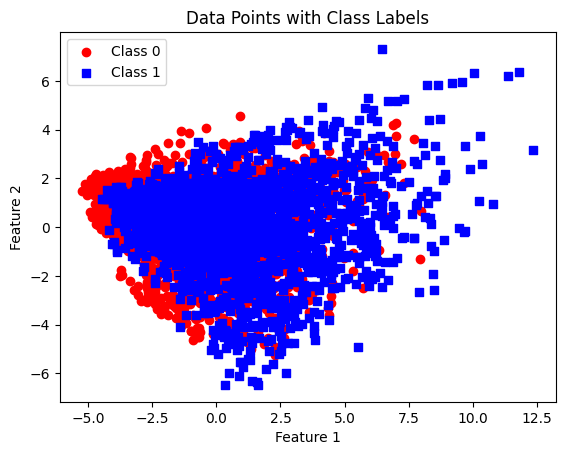

In [7]:
class_0_points = df[ytrain == 0]
class_1_points = df[ytrain == 1]

plt.scatter(class_0_points[:, 0], class_0_points[:, 1], c='red', marker='o', label='Class 0')
plt.scatter(class_1_points[:, 0], class_1_points[:, 1], c='blue', marker='s', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Points with Class Labels')
plt.legend()
plt.show()

## PCA on xtrain with k-mean cluster labels

/project/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


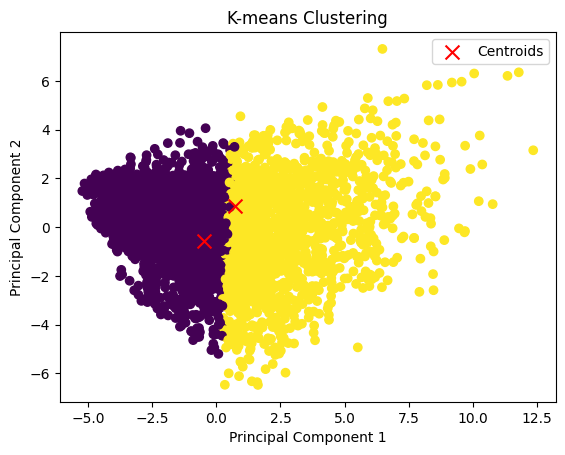

In [26]:
k = 2  # Number of clusters you want to create
kmeans = KMeans(n_clusters=k)
kmeans.fit(xtrain)
labels = kmeans.labels_
from sklearn.decomposition import PCA
# Reduce data to 2 dimensions using PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(xtrain)

# Plot the clusters
centroids = kmeans.cluster_centers_
# Plot the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [27]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(xtrain)

# Get the cluster centers
centers = kmeans.cluster_centers_


/project/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
dist_to_center_1 = np.linalg.norm( xtrain- centers[0], axis=1)
dist_to_center_2 = np.linalg.norm( xtrain - centers[1], axis=1)

In [29]:
labels2 = np.where(dist_to_center_1 < dist_to_center_2, 1, 0)

In [30]:
calculate_accuracy(labels,labels2)

0.9936932391523713

In [31]:
labels

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

In [32]:
labels2

array([0, 1, 0, ..., 0, 0, 0])

In [35]:
labels2 = np.logical_not(labels2).astype(int)

In [34]:
calculate_accuracy(labels,labels2)

0.006306760847628658

## T-SNE on xtrain with ground truth labels

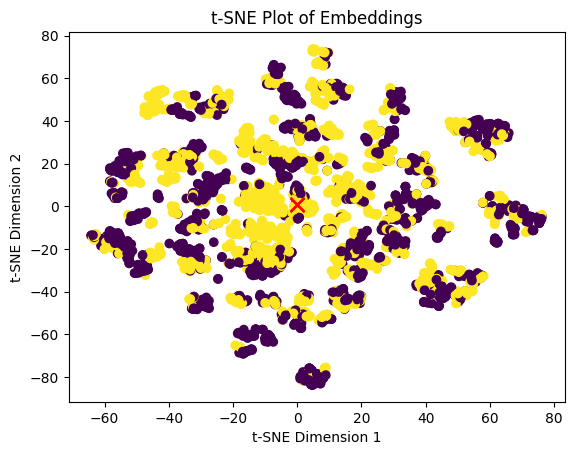

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(xtrain)
centroids = kmeans.cluster_centers_
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=ytrain)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Plot of Embeddings')
plt.show()

/project/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


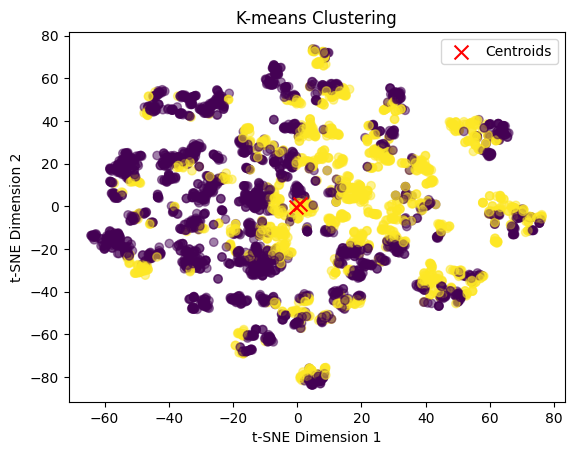

In [109]:
k = 2
kmeans = KMeans(n_clusters=k)
kmeans.fit(xtrain)
labels = kmeans.labels_
tsne = TSNE(n_components=2, random_state=42)
reduced_data = tsne.fit_transform(xtrain)
centroids = kmeans.cluster_centers_
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

# Implementing Contrastive Loss (N-Pair)

In [110]:
class SupervisedContrastiveLoss(keras.losses.Loss):
    def __init__(self, temperature=temperature, name=None):
        super(SupervisedContrastiveLoss, self).__init__(name=name)
        self.temperature = temperature

    def __call__(self, labels, feature_vectors, sample_weight=None):
        print(feature_vectors.shape)
        feature_vectors_normalized = tf.math.l2_normalize(feature_vectors, axis=1)
        logits = tf.divide(tf.matmul(feature_vectors_normalized, tf.transpose(feature_vectors_normalized)), self.temperature)
        return 0.35*(tfa.losses.npairs_loss(tf.squeeze(labels), logits))

In [111]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Input, Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow_addons as tfa
xtra_a, xval_a, ytra_a, yval_a = train_test_split(xtrain, ytrain, test_size=0.2, random_state=42)
input_shape = (38,1)

In [112]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Input, Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow_addons as tfa
xtra_a, xval_a, ytra_a, yval_a = train_test_split(xtrain, ytrain, test_size=0.2, random_state=42)
input_shape = (38,1)

In [113]:
class Encoder(Model):
  def __init__(self, latent_dim):
    super(Encoder, self).__init__()
    input_shape = (38,1)
    self.latent_dim = latent_dim 
    inputs = Input(shape=(38,1))
    outputs = inputs  
    self.encoder = tf.keras.Sequential([
      inputs,
      
      layers.Conv1D(filters=64, kernel_size=2, activation='relu'),
      layers.MaxPooling1D(pool_size=1),
      layers.Dropout(0.5),
      layers.Conv1D(filters=32, kernel_size=2, activation='relu'),
      layers.MaxPooling1D(pool_size=1),
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])

  def call(self, x):
    encoded = self.encoder(x)
    return encoded

latent_dim=30

def create_encoder():
    return Encoder(latent_dim)


def add_projection_head(Encoder):
    inp = keras.Input(shape=input_shape)
    hidden  = Encoder(inp)
    features = layers.Dense(16, activation="relu")(hidden)
    model = keras.Model(
        inputs=inp, outputs=features, name="cifar-encoder_with_projection-head"
    )
    return model

In [114]:
encoder = create_encoder()
encoder_with_projection_head = add_projection_head(encoder)
encoder_with_projection_head.compile(optimizer=keras.optimizers.Adam(learning_rate),loss=SupervisedContrastiveLoss(temperature))
encoder_with_projection_head.summary()
history = encoder_with_projection_head.fit(xtra_a, ytra_a , validation_data =(xval_a,yval_a), batch_size=32, epochs=100, callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)])

Model: "cifar-encoder_with_projection-head"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 38, 1)]           0         
                                                                 
 encoder_4 (Encoder)         (None, 30)                38910     
                                                                 
 dense_9 (Dense)             (None, 16)                496       
                                                                 
Total params: 39,406
Trainable params: 39,406
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
(None, 16)
(None, 16)
100/100 [==============================] - 2s 6ms/step - loss: 1.2458 - val_loss: 1.2034
Epoch 2/100
100/100 [==============================] - 1s 5ms/step - loss: 1.1981 - val_loss: 1.1860
Epoch 3/100
100/100 [==============================] - 1s 6ms/step -

In [115]:
trainoutputs = encoder_with_projection_head.predict(xtrain)

124/124 [==============================] - 0s 1ms/step


## TSNE FOR ENCODER ON TRAIN WITH GROUND TRUTH

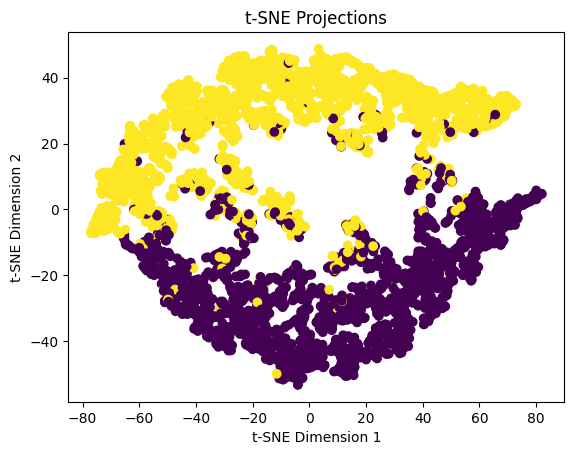

In [90]:
tsne = TSNE(n_components=2, random_state=42)
projections = tsne.fit_transform(trainoutputs)
# Plot the projections
plt.scatter(projections[:, 0], projections[:, 1],c=ytrain)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Projections')
plt.show()

## TSNE FOR ENCODER ON TRAIN WITH K-Mean Labels

/project/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


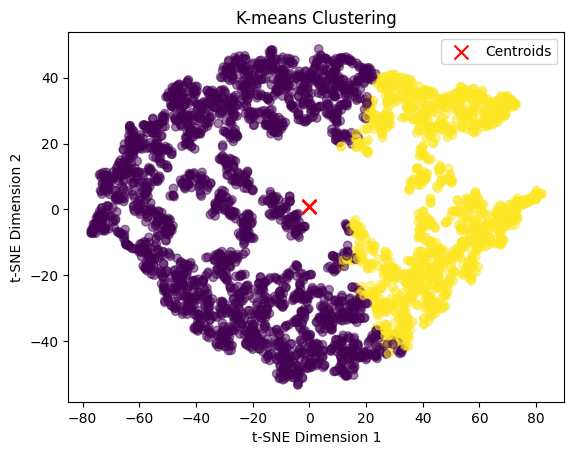

In [91]:
k = 2  # Number of clusters you want to create
kmeans = KMeans(n_clusters=k)
kmeans.fit(trainoutputs)

# Step 3: Get cluster labels for each example
labels = kmeans.labels_

# Step 4: Reduce data to 2 dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42)
reduced_data = tsne.fit_transform(trainoutputs)

# Step 5: Get cluster centroids
centroids = kmeans.cluster_centers_

# Step 6: Plot the clusters and centroids
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

# PCA FOR ENCODER ON TRAIN

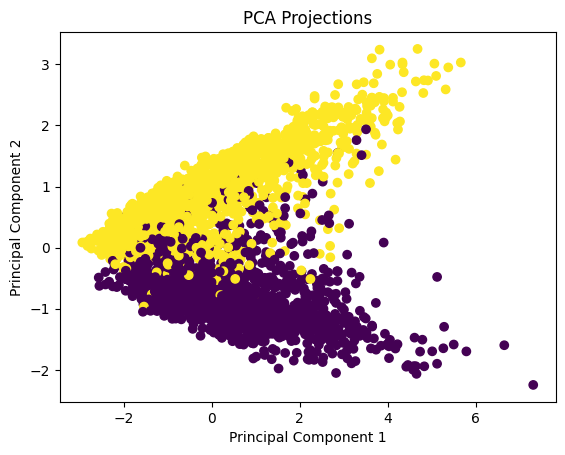

In [92]:
pca = PCA(n_components=2, random_state=42)
projections = pca.fit_transform(trainoutputs)
# Plot the projections
plt.scatter(projections[:, 0], projections[:, 1],c=ytrain)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projections')
plt.show()

/project/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


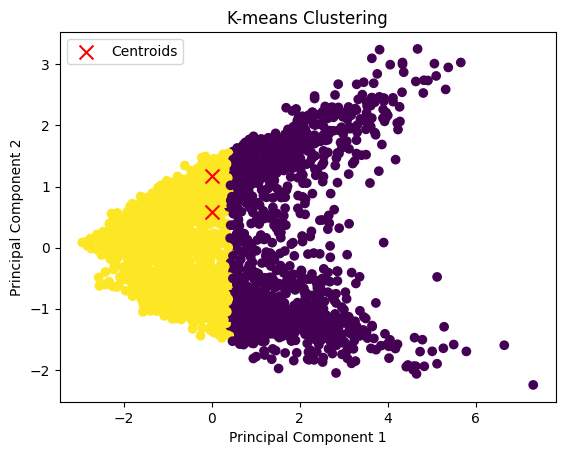

In [93]:
k = 2  # Number of clusters you want to create
kmeans = KMeans(n_clusters=k)
kmeans.fit(trainoutputs)
labels = kmeans.labels_
from sklearn.decomposition import PCA

# Reduce data to 2 dimensions using PCA
pca = PCA(n_components=2,random_state=42)
reduced_data = pca.fit_transform(trainoutputs)

# Plot the clusters
centroids = kmeans.cluster_centers_
# Plot the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


/project/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


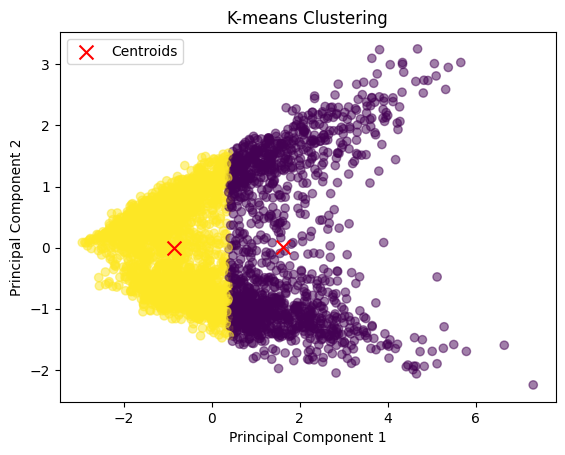

In [94]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(reduced_data)

# Step 3: Get cluster labels for each example
labels = kmeans.labels_

# Step 4: Reduce data to 2 dimensions using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(reduced_data)

# Step 5: Get cluster centroids
centroids = kmeans.cluster_centers_

# Step 6: Plot the clusters and centroids
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# TSNE FOR ENCODER ON TEST

In [95]:
testoutputs = encoder_with_projection_head.predict(xtest)

103/103 [==============================] - 0s 2ms/step


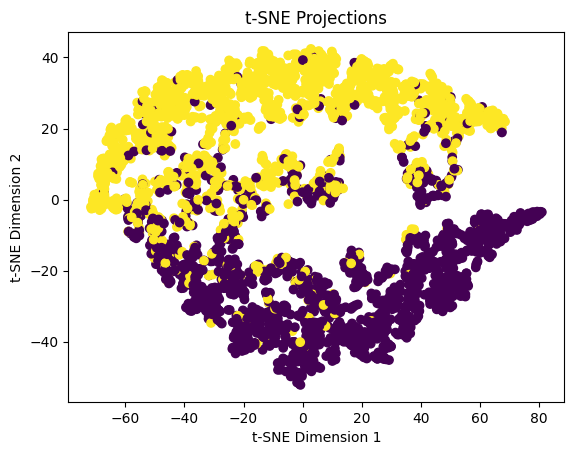

In [96]:
tsne = TSNE(n_components=2, random_state=42)
projections = tsne.fit_transform(testoutputs)
# Plot the projections
plt.scatter(projections[:, 0], projections[:, 1],c=ytest)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Projections')
plt.show()

/project/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


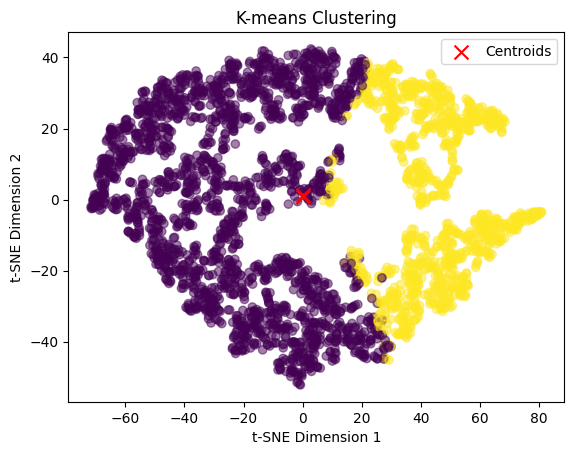

In [97]:
k = 2  # Number of clusters you want to create
kmeans = KMeans(n_clusters=k)
kmeans.fit(testoutputs)

# Step 3: Get cluster labels for each example
labels = kmeans.labels_

# Step 4: Reduce data to 2 dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42)
reduced_data = tsne.fit_transform(testoutputs)

# Step 5: Get cluster centroids
centroids = kmeans.cluster_centers_

# Step 6: Plot the clusters and centroids
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

# PCA FOR ENCODER ON TEST

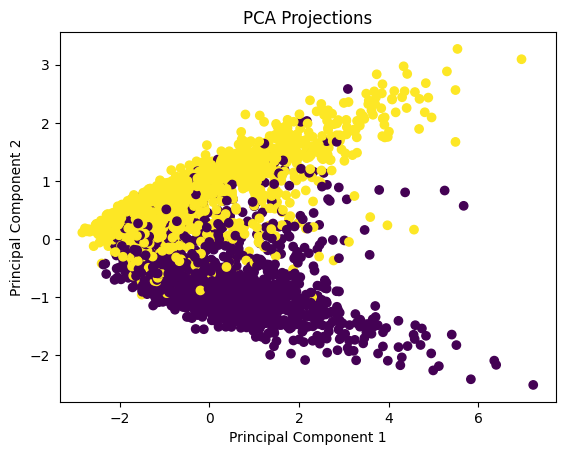

In [98]:
pca = PCA(n_components=2, random_state=42)
projections = pca.fit_transform(testoutputs)
# Plot the projections
plt.scatter(projections[:, 0], projections[:, 1],c=ytest)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projections')
plt.show()

/project/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


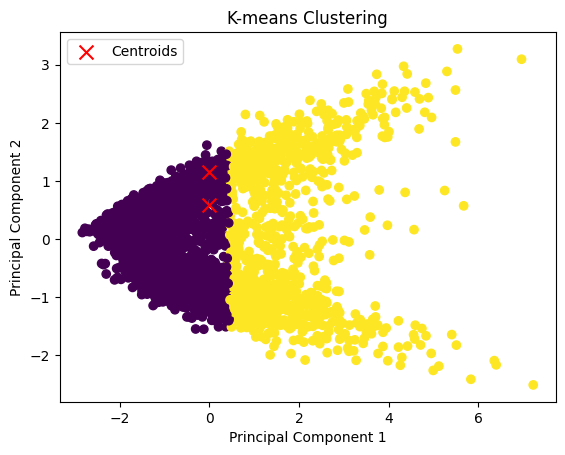

In [99]:
k = 2  # Number of clusters you want to create
kmeans = KMeans(n_clusters=k)
kmeans.fit(testoutputs)
labels = kmeans.labels_
from sklearn.decomposition import PCA

# Reduce data to 2 dimensions using PCA
pca = PCA(n_components=2,random_state=42)
reduced_data = pca.fit_transform(testoutputs)

# Plot the clusters
centroids = kmeans.cluster_centers_
# Plot the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Output of encoder as 2

In [100]:
class Encoder(Model):
  def __init__(self, latent_dim):
    super(Encoder, self).__init__()
    self.latent_dim = latent_dim 
    inputs = Input(shape=(38,1))
    outputs = inputs  
    self.encoder = tf.keras.Sequential([
      inputs,
      
      layers.Conv1D(filters=64, kernel_size=2, activation='relu'),
      layers.MaxPooling1D(pool_size=1),
      layers.Dropout(0.5),
      layers.Conv1D(filters=32, kernel_size=2, activation='relu'),
      layers.MaxPooling1D(pool_size=1),
      layers.Conv1D(filters=16, kernel_size=2, activation='relu'),
      layers.MaxPooling1D(pool_size=1),
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])

  def call(self, x):
    encoded = self.encoder(x)
    return encoded
latent_dim=30

def create_encoder():
    return Encoder(latent_dim)


def add_projection_head(Encoder):
    inp = keras.Input(shape=input_shape)
    hidden  = Encoder(inp)
    features = layers.Dense(4, activation="relu")(hidden)
    features = layers.Dense(2, activation="softmax")(features)
    model = keras.Model(
        inputs=inp, outputs=features, name="cifar-encoder_with_projection-head"
    )
    return model
input_shape = (38,1)
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow_addons as tfa
encoder = create_encoder()
encoder_with_projection_head = add_projection_head(encoder)
encoder_with_projection_head.compile(optimizer=keras.optimizers.Adam(learning_rate),loss=SupervisedContrastiveLoss(temperature))
encoder_with_projection_head.summary()
history = encoder_with_projection_head.fit(xtra_a, ytra_a , validation_data =(xval_a,yval_a), batch_size=32, epochs=100, callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)])


Model: "cifar-encoder_with_projection-head"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 38, 1)]           0         
                                                                 
 encoder_3 (Encoder)         (None, 30)                22190     
                                                                 
 dense_6 (Dense)             (None, 4)                 124       
                                                                 
 dense_7 (Dense)             (None, 2)                 10        
                                                                 
Total params: 22,324
Trainable params: 22,324
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
(None, 2)
(None, 2)
100/100 [==============================] - 3s 7ms/step - loss: 1.2002 - val_loss: 1.1821
Epoch 2/100
100/100 [==================

In [101]:
trainoutputs = encoder_with_projection_head.predict(xtrain)

124/124 [==============================] - 0s 2ms/step


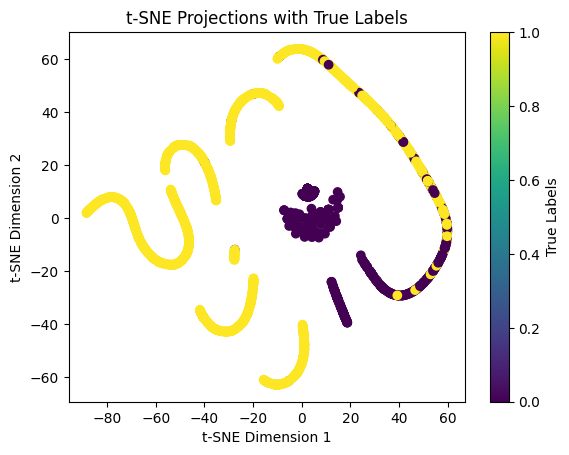

In [102]:
tsne = TSNE(n_components=2, random_state=42)
projections = tsne.fit_transform(trainoutputs)

# Plot the projections with true labels
plt.scatter(projections[:, 0], projections[:, 1], c=ytrain)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Projections with True Labels')
plt.colorbar(label='True Labels')
plt.show()

In [103]:
testoutputs = encoder_with_projection_head.predict(xtest)

103/103 [==============================] - 0s 2ms/step


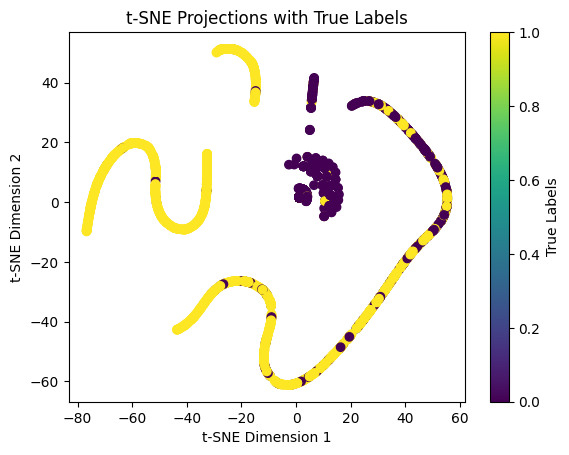

In [104]:
tsne = TSNE(n_components=2, random_state=42)
projections = tsne.fit_transform(testoutputs)
plt.scatter(projections[:, 0], projections[:, 1], c=ytest)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Projections with True Labels')
plt.colorbar(label='True Labels')
plt.show()